In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading the dataset
wine = pd.read_csv('winequality-red.csv')

In [3]:
#take a look at the data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


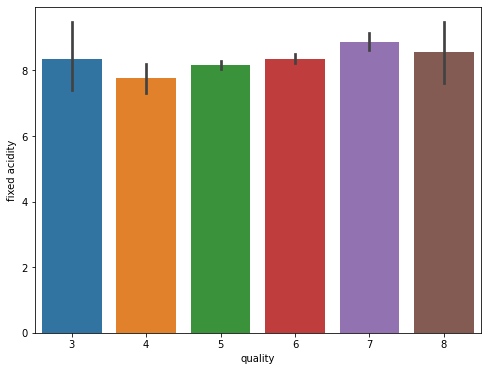

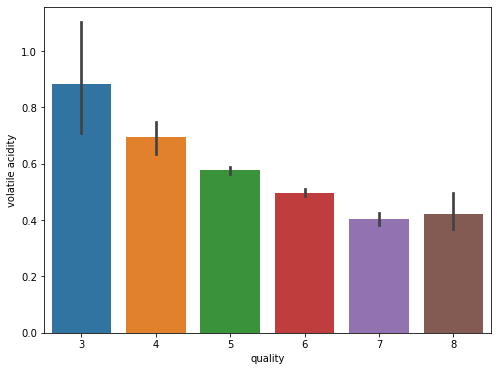

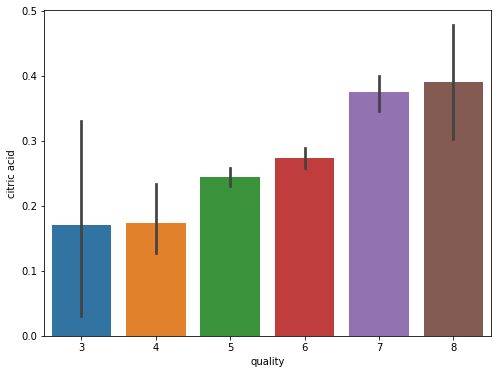

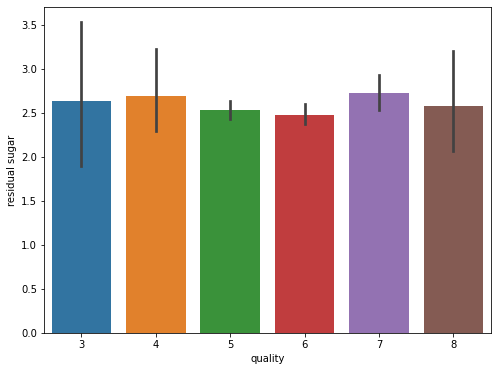

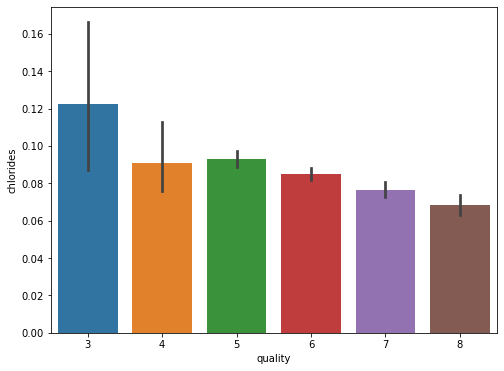

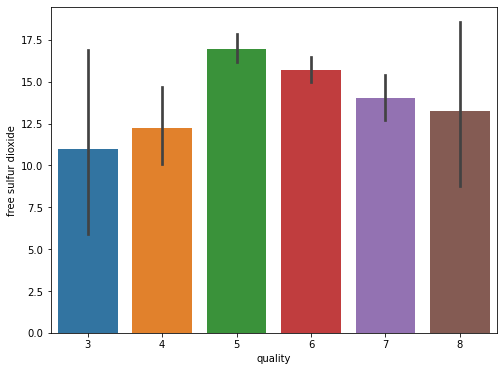

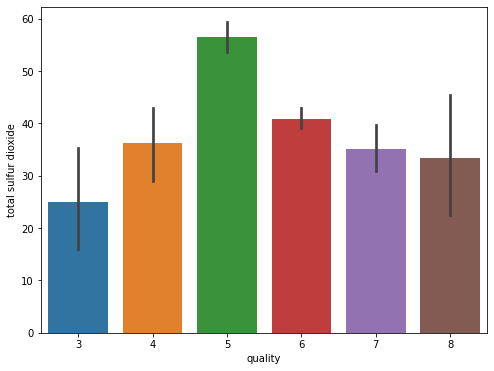

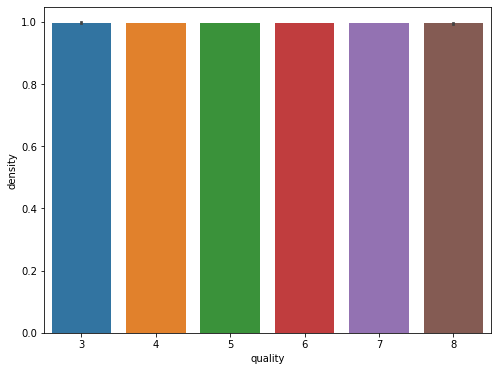

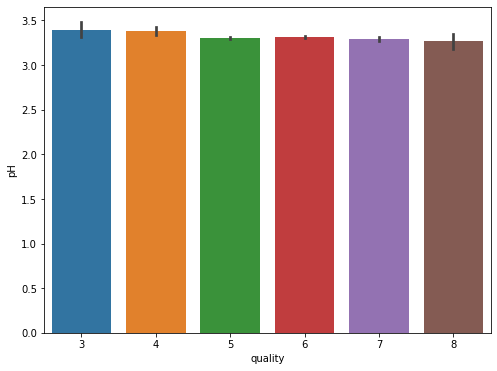

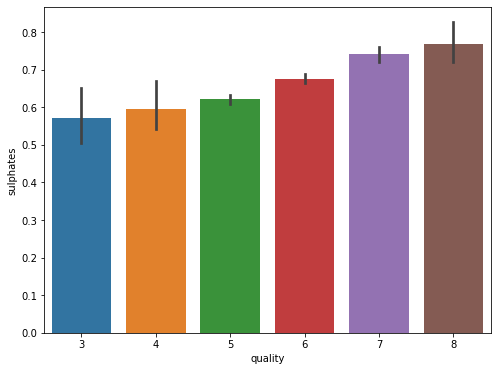

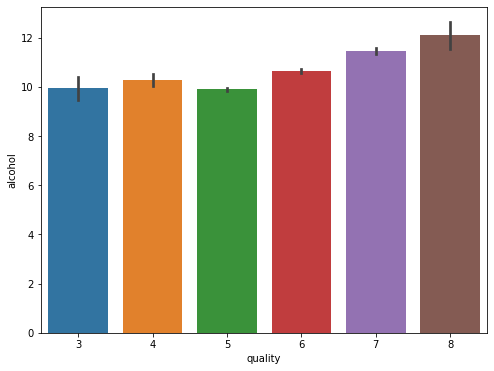

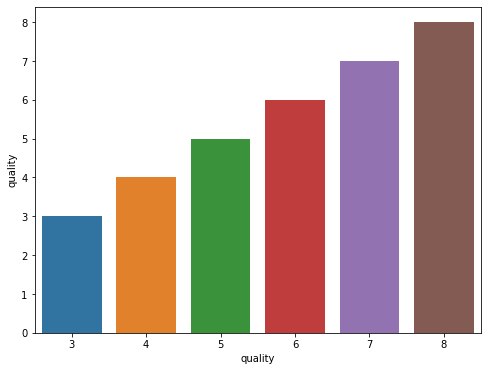

In [5]:
#Here we see that fixed acidity does not give any specification to classify the quality.

i=0
for i in wine.columns:
    fig = plt.figure(figsize = (8,6))
    sns.barplot(x = 'quality', y = i, data = wine)
    plt.show()
    
    

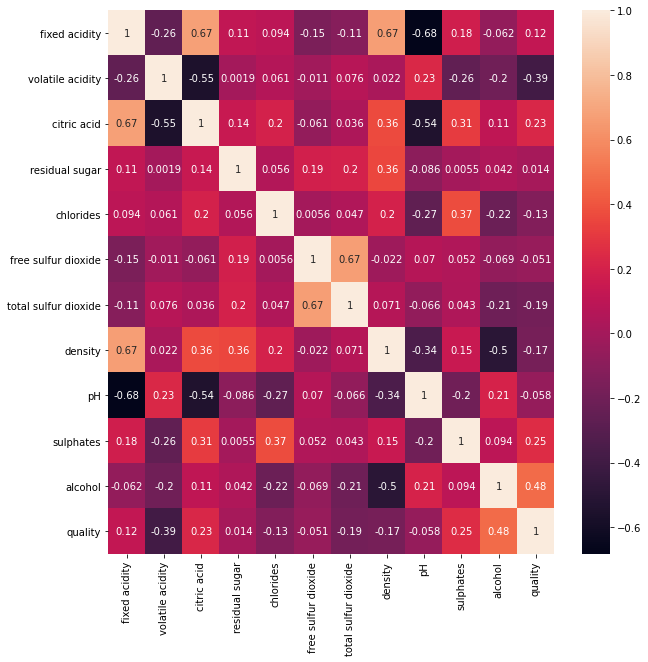

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True)
plt.show()

## Preprocessing Data for performing Machine learning algorithms

In [7]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [8]:
le = LabelEncoder()

In [9]:
wine['quality'] = le.fit_transform(wine['quality'])

In [10]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
#Now seperate the dataset as response variable and feature variabes
X =wine.drop('quality',axis=1)
y = wine['quality']

In [12]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Our training and testing data is ready now to perform machine learning algorithm

### Random Forest Classifier

In [15]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [16]:
rfc.score(X_test, y_test)

0.878125

In [17]:
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 31  16]]


In [18]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.34      0.45        47

    accuracy                           0.88       320
   macro avg       0.78      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



Random Forest Classifier has a %89 accuracy

## Let's try to increase our accuracy of models

### Grid Search CV

In [19]:
params = {
    'n_estimators':[200,250,300,350],
    'max_depth': [5,6,7],
    
}
grid_rfc = GridSearchCV(rfc,param_grid=params,cv=10)

In [20]:
grid_rfc.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [5, 6, 7],
                         'n_estimators': [200, 250, 300, 350]})

In [21]:
sc1 = grid_rfc.score(X_test, y_test)
sc1

0.86875

In [22]:
grid_rfc.best_params_

{'max_depth': 7, 'n_estimators': 250}

In [23]:
rfc_CV = RandomForestClassifier(n_estimators=250,max_depth=7)
rfc_CV.fit(X_train, y_train)
pred_rfc_CV = rfc_CV.predict(X_test)


In [24]:
print(classification_report(y_test,pred_rfc_CV))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       273
           1       0.68      0.28      0.39        47

    accuracy                           0.88       320
   macro avg       0.79      0.63      0.66       320
weighted avg       0.86      0.88      0.85       320

